In [780]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [781]:
from PIL import Image 
import glob
import os

In [782]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	

In [783]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [784]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [785]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [786]:
import os
import glob
import numpy as np
from PIL import Image

def load_data(img_path, number_of_data=300):  # number_of_data는 기본값으로 유지
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size = 28
    color = 3
    categories = ['scissor', 'rock', 'paper']
    
    imgs = []
    labels = []
    
    for idx, category in enumerate(categories):
        label = idx
        image_dir = os.path.join(img_path, category)
        for file in glob.iglob(os.path.join(image_dir, "*.jpg")):
            img = np.array(Image.open(file), dtype=np.int32)
            imgs.append(img)
            labels.append(label)
    
    imgs = np.array(imgs)
    labels = np.array(labels)
    
    print("데이터의 이미지 개수는", len(imgs),"입니다.")
    return imgs, labels


In [787]:
image_dir_path = "rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path)

# 정규화
x_train_norm = x_train.astype('float32') / 255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

데이터의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨 :  0


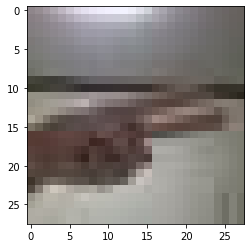

In [788]:
plt.imshow(x_train[30])
print('라벨 : ', y_train[30])

# 딥러닝 네트워크 설계하기

In [789]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# 아래의 하이퍼파라미터는 예시입니다. 높은 인식률을 얻기 위해 하이퍼파라미터를 수정해 보세요. 
n_channel_1=16
n_channel_2=32
n_dense=64
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)


Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_233 (Conv2D)          (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_233 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_234 (Conv2D)          (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_234 (MaxPoolin (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_92 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_184 (Dense)            (None, 64)                51264     
_________________________________________________________________
dense_185 (Dense)            (None, 3)               

# 테스트 하기

In [790]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test.astype('float32') / 255.0
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


209  images to be resized.
209  images resized.
202  images to be resized.
202  images resized.
212  images to be resized.
212  images resized.
데이터의 이미지 개수는 623 입니다.
x_test shape: (623, 28, 28, 3)
y_test shape: (623,)


In [791]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss : {:.4f}".format(test_loss))
print("test_accuracy : {:.4f}".format(test_accuracy))

20/20 - 0s - loss: 1.0789 - accuracy: 0.7608
test_loss : 1.0789
test_accuracy : 0.7608


In [792]:
import matplotlib.pyplot as plt

# 학습 결과 시각화 함수
def plot_training_history(history):
    # 히스토리 객체에서 필요한 데이터를 가져오기
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    # 정확도 그래프
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # 손실 그래프
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'ro', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()


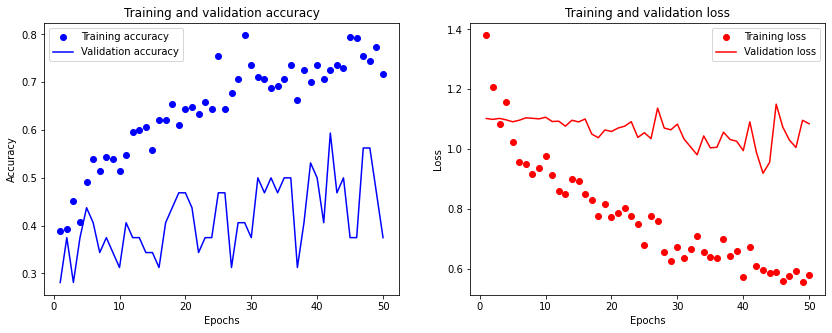

In [794]:
plot_training_history(history)

- 데이터 300개 가지고 최대한 해보려했으나(데이터 분할, 증강 , 다른 모델) 성능이 좋지 않았다.
- 풍부한 데이터 셋이 먼저구나라고 생각하고, 데이터를 늘려야겠다는 생각을 했다. 

### 훈련 데이터 보충 후 학습

In [816]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# 아래의 하이퍼파라미터는 예시입니다. 높은 인식률을 얻기 위해 하이퍼파라미터를 수정해 보세요. 
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test.astype('float32') / 255.0
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss : {:.4f}".format(test_loss))
print("test_accuracy : {:.4f}".format(test_accuracy))

Model: "sequential_115"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_281 (Conv2D)          (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_281 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_282 (Conv2D)          (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_282 (MaxPoolin (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_114 (Flatten)        (None, 800)               0         
_________________________________________________________________
dense_228 (Dense)            (None, 32)                25632     
_________________________________________________________________
dense_229 (Dense)            (None, 3)              

In [805]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# 데이터 증강
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

# 모델 설계
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', input_shape=(28,28,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 조기 종료 콜백
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 훈련
model.fit(datagen.flow(x_train, y_train, batch_size=32),
          epochs=20,
          validation_data=(x_val, y_val),
          callbacks=[early_stopping])

# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss : {:.4f}".format(test_loss))
print("test_accuracy : {:.4f}".format(test_accuracy))

Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_258 (Conv2D)          (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_258 (MaxPoolin (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_259 (Conv2D)          (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_259 (MaxPoolin (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_260 (Conv2D)          (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_260 (MaxPoolin (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_103 (Flatten)        (None, 64)             

- 더 좋아진 것을 알 수 있다. 즉 훈련 데이터셋이 풍부하면 학습을 잘하여 과적합만 방지할 경우에, 예측을 잘하는 것을 알 수 있다.